<a href="https://colab.research.google.com/github/ChaitanyaAtchuta5/Advanced-House-Price-Prediction/blob/master/Advanced_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ADVANCED HOUSE PRICE PREDICTION**

The main aim of this Problem is to predict the House Price Based on Various Features

In [81]:
#Importing REquired Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as axes
import missingno as msno
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline
#This will display the DataFrame with all the coulumns in the DataSet
pd.set_option('display.max_columns', 0)

In [2]:
#Importing Data
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#Printing top 5 rows of the Dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Print only the column names of the DataFrame
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Print Datatype of all the features in the dataset
pd.set_option('display.max_rows',None)
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Exploratory Data Analysis

In this step we'll deal with 

1.   Missing Values 
2.   Divide the features to numerical and Categorical
3.   Plotting some Visualizations
4.   Distribution of Data
5.   Relationship between Dependent and independent features
6.   Plotting some Visualizations


In [6]:
#Shape of the Dataset
df_train_len = len(df_train)
df_test_len = len(df_test)
print('Training Set Size : ',df_train.shape)
print('Testing Set Size : ',df_test.shape)

Training Set Size :  (1460, 81)
Testing Set Size :  (1459, 80)


In [7]:
target = 'SalePrice'

Here the target Variable i.e Dependent feature is SalePrice


We'll Start with finding the Missing Values

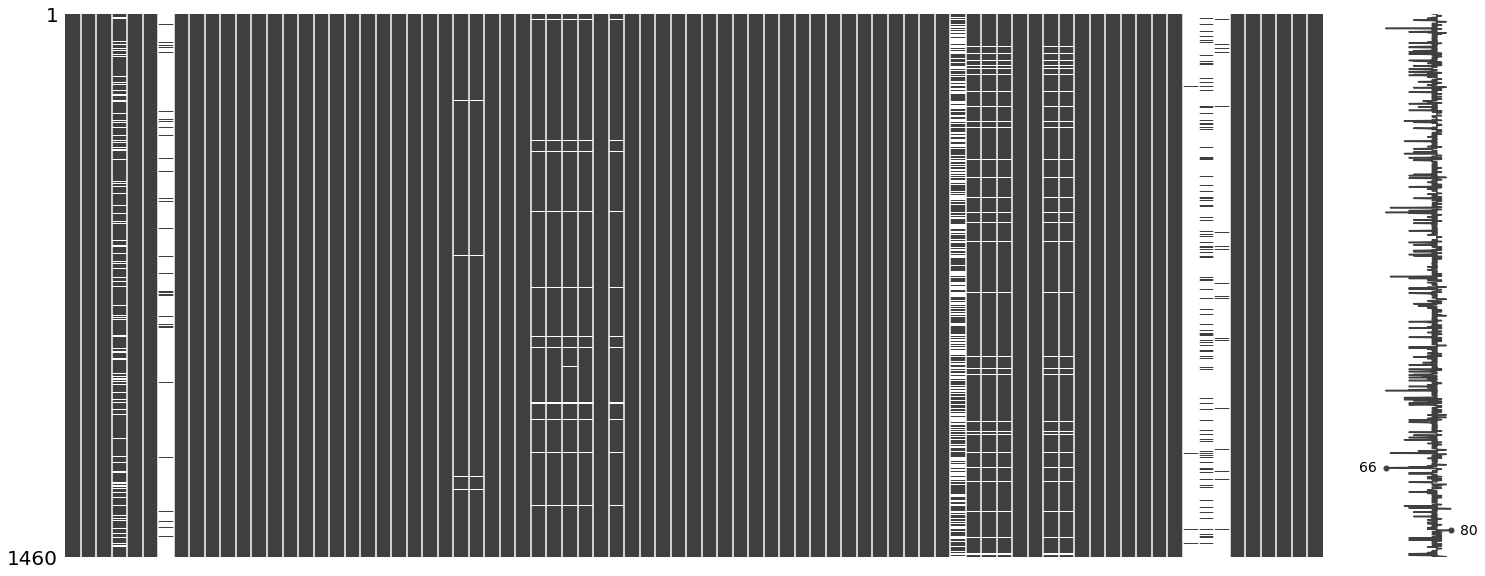

In [8]:
msno.matrix(df_train)

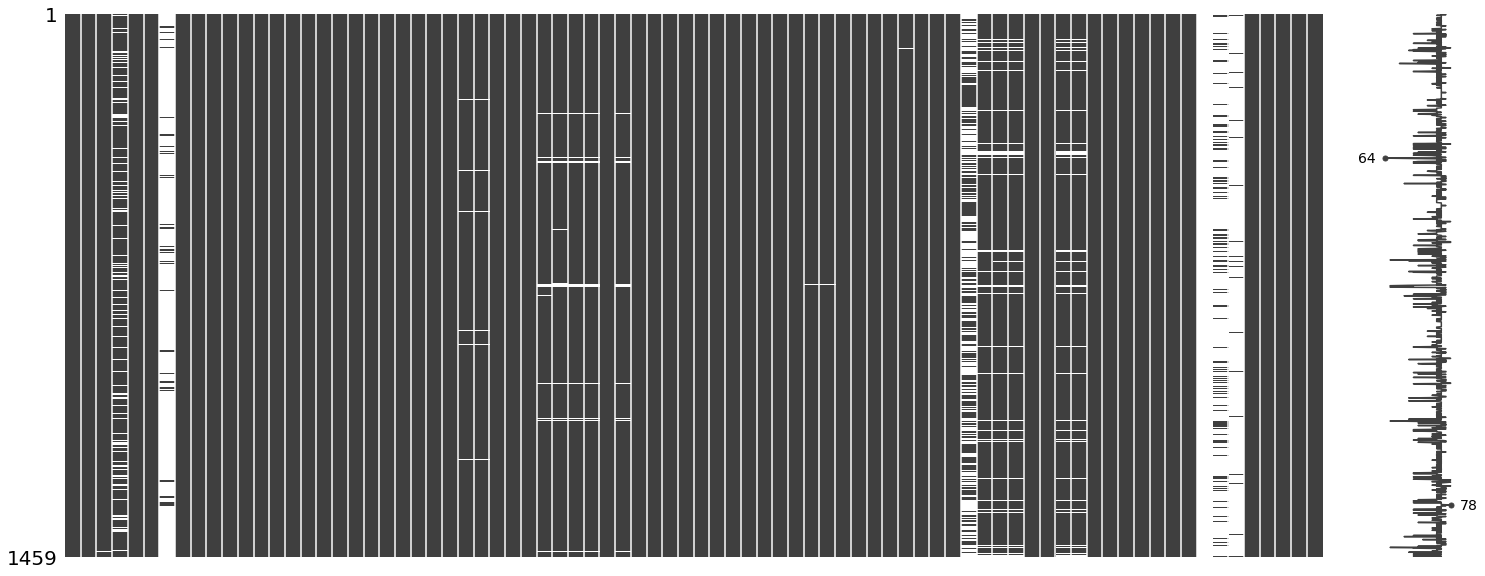

In [9]:
msno.matrix(df_test)

In [10]:
#First we need to find the features which has missing values
features_names = df_test.columns
features_names_nan = [feature for feature in features_names if df_test[feature].isna().sum() > 0] 
print('No of Features with Missing Values in test set: ', len(features_names_nan))

#Print the %age of Missing Values
for feature in features_names_nan:
   percent = np.round(df_test[feature].isna().mean() * 100 ,4)
   print(feature,' : ', percent,'%')

No of Features with Missing Values in test set:  33
MSZoning  :  0.2742 %
LotFrontage  :  15.5586 %
Alley  :  92.6662 %
Utilities  :  0.1371 %
Exterior1st  :  0.0685 %
Exterior2nd  :  0.0685 %
MasVnrType  :  1.0966 %
MasVnrArea  :  1.0281 %
BsmtQual  :  3.0158 %
BsmtCond  :  3.0843 %
BsmtExposure  :  3.0158 %
BsmtFinType1  :  2.8787 %
BsmtFinSF1  :  0.0685 %
BsmtFinType2  :  2.8787 %
BsmtFinSF2  :  0.0685 %
BsmtUnfSF  :  0.0685 %
TotalBsmtSF  :  0.0685 %
BsmtFullBath  :  0.1371 %
BsmtHalfBath  :  0.1371 %
KitchenQual  :  0.0685 %
Functional  :  0.1371 %
FireplaceQu  :  50.0343 %
GarageType  :  5.209 %
GarageYrBlt  :  5.3461 %
GarageFinish  :  5.3461 %
GarageCars  :  0.0685 %
GarageArea  :  0.0685 %
GarageQual  :  5.3461 %
GarageCond  :  5.3461 %
PoolQC  :  99.7944 %
Fence  :  80.1234 %
MiscFeature  :  96.5045 %
SaleType  :  0.0685 %


In [11]:
#First we need to find the features which has missing values
features_names = df_train.columns
features_names_nan = [feature for feature in features_names if df_train[feature].isna().sum() > 0] 
print('No of Features with Missing Values in train set: ', len(features_names_nan))

#Print the %age of Missing Values
for feature in features_names_nan:
   percent = np.round(df_train[feature].isna().mean() * 100 ,4)
   print(feature,' : ', percent,'%')

No of Features with Missing Values in train set:  19
LotFrontage  :  17.7397 %
Alley  :  93.7671 %
MasVnrType  :  0.5479 %
MasVnrArea  :  0.5479 %
BsmtQual  :  2.5342 %
BsmtCond  :  2.5342 %
BsmtExposure  :  2.6027 %
BsmtFinType1  :  2.5342 %
BsmtFinType2  :  2.6027 %
Electrical  :  0.0685 %
FireplaceQu  :  47.2603 %
GarageType  :  5.5479 %
GarageYrBlt  :  5.5479 %
GarageFinish  :  5.5479 %
GarageQual  :  5.5479 %
GarageCond  :  5.5479 %
PoolQC  :  99.5205 %
Fence  :  80.7534 %
MiscFeature  :  96.3014 %


Finding Relationship between Missing Values and SalePrice

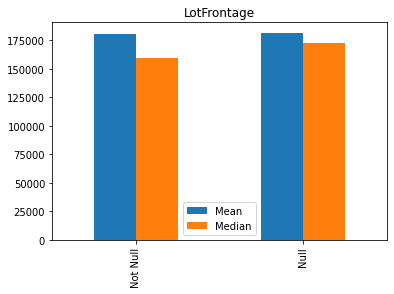

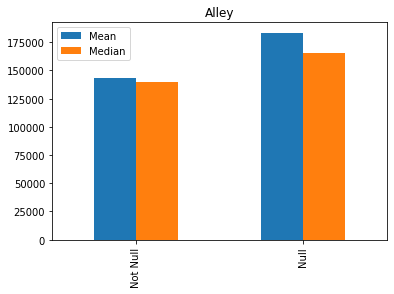

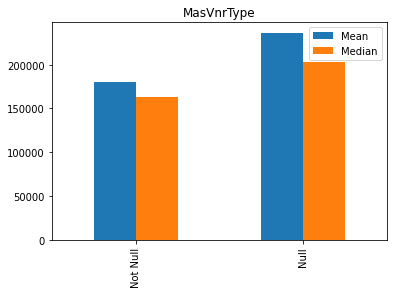

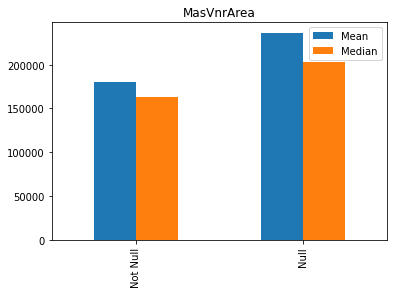

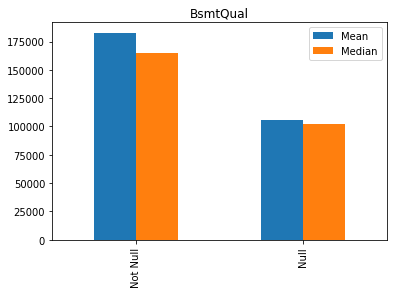

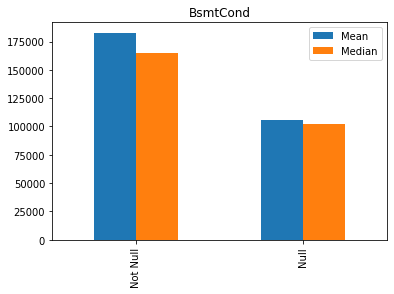

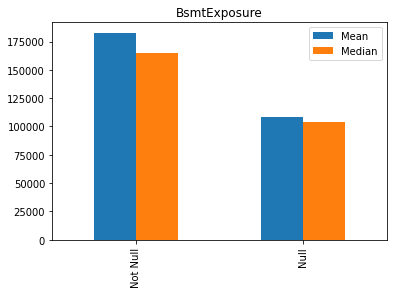

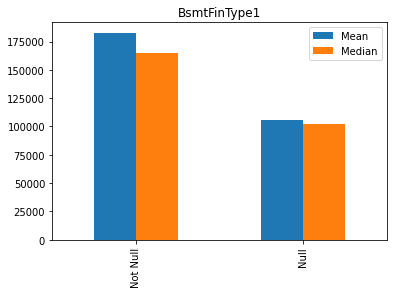

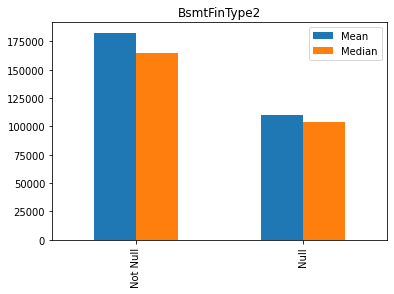

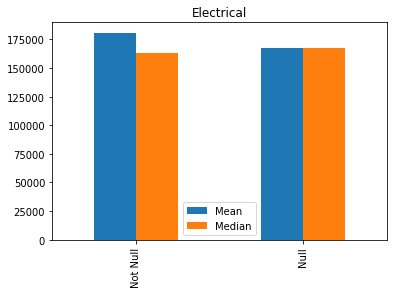

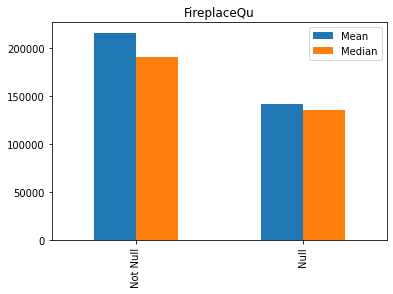

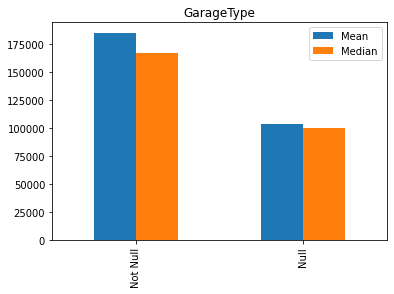

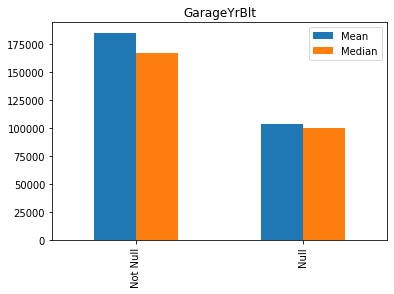

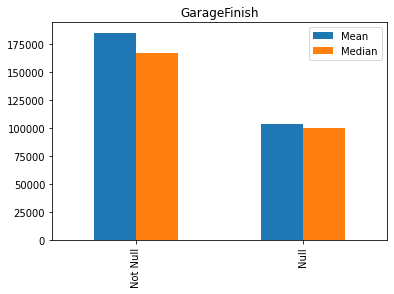

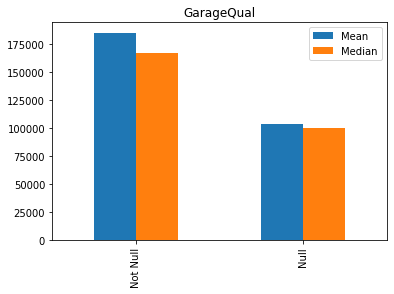

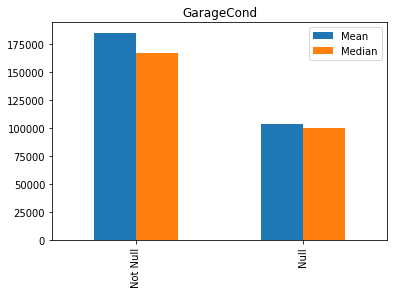

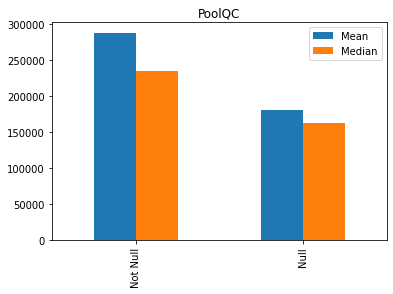

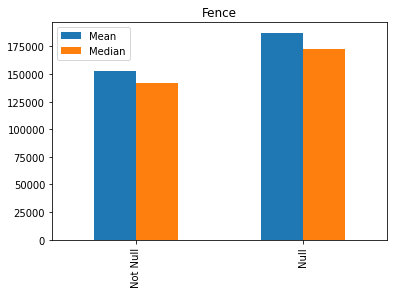

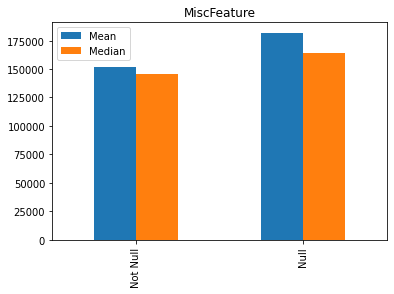

In [12]:
temp_data = df_train.copy()
for feature in features_names_nan:
  temp_data[feature] = np.where(temp_data[feature].isna(),'Null','Not Null')
  pd.concat([temp_data.groupby(feature)[target].mean() ,temp_data.groupby(feature)[target].median()], axis=1, ignore_index=True).plot.bar()
  plt.title(feature)
  plt.legend(['Mean','Median'])
  plt.xlabel(None)
  plt.show()

Here we can see that there is significant effect of Missing Values on the SalePrice. So We need to impute the Missing values with some meaningful values

In [13]:
#Numerical Features
features_num = [feature for feature in features_names if df_train[feature].dtypes != 'O']
print('No of Numerical Features : ',len(features_num))

df_train[features_num].head()

No of Numerical Features :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


We can see that there are some Year Features in the Numerical features so we need to seperate them. This type of features are called Temporal Features

In [14]:
#Temporal Features
features_year = [feature for feature in features_num if any(word in feature for word in ['Year','Yr'])]
df_train[features_year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


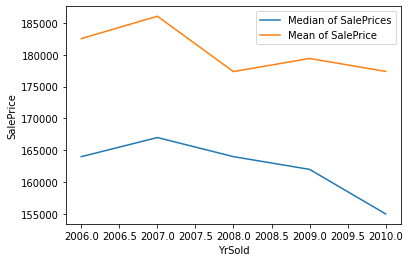

In [15]:
#We'll plot a graph YrSold and SalePrice to check the relation betwwen them
#Changing dtype of YrSold to int
df_train['YrSold'].astype('int64')
df_train.groupby('YrSold')[target].median().plot()
df_train.groupby('YrSold')[target].mean().plot()
plt.legend(['Median of SalePrices','Mean of SalePrice'])
plt.xlabel('YrSold')
plt.ylabel(target)

plt.show()

we can observe that as Year goes on SalePrice is decreasing. Generally it should increase. There Might be a reason for decreasing. Since We are not considering the YearBuilt, We are not able to find a proper relationship. Let's Consider new Feature Which Says the Age of that Particular House.

In [16]:
#Building a new DataFrame for the Age
df_year = pd.DataFrame()
for feature in features_year:
  if feature != 'YrSold':
    df_year['age'+feature] = df_train['YrSold'] - df_train[feature]

df_year = pd.concat([df_year,df_train[target]], axis=1)
df_year.head()

,ageYearBuilt,ageYearRemodAdd,ageGarageYrBlt,SalePrice
0,5,5,5.0,208500
1,31,31,31.0,181500
2,7,6,7.0,223500
3,91,36,8.0,140000
4,8,8,8.0,250000


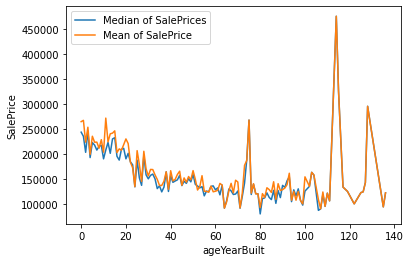

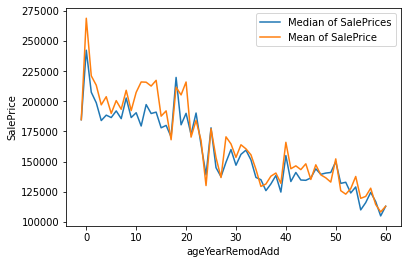

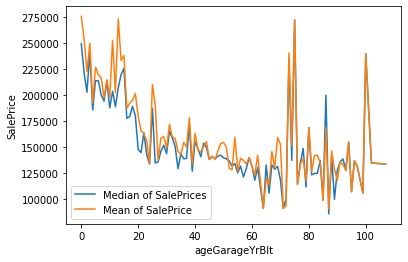

In [17]:
#Now Plotting the graph again
for feature in df_year.columns:
  if feature != target:
    df_year.groupby(feature)[target].median().plot()
    df_year.groupby(feature)[target].mean().plot()
    plt.legend(['Median of SalePrices','Mean of SalePrice'])
    plt.xlabel(feature)
    plt.ylabel(target)

    plt.show()

Now we can see that we are getting some relationship i.e As Age of the building increases SalePrice decreases.

In [18]:
#Discretre Numerical Features
features_num_disc = [feature for feature in features_num if len(df_train[feature].unique()) <= 25 and feature not in features_year]
print('No of Discrete Features : ',len(features_num_disc))
for feature in features_num_disc:
  print(feature,' : ',len(df_train[feature].unique()),' Unique Values' )

No of Discrete Features :  17
MSSubClass  :  15  Unique Values
OverallQual  :  10  Unique Values
OverallCond  :  9  Unique Values
LowQualFinSF  :  24  Unique Values
BsmtFullBath  :  4  Unique Values
BsmtHalfBath  :  3  Unique Values
FullBath  :  4  Unique Values
HalfBath  :  3  Unique Values
BedroomAbvGr  :  8  Unique Values
KitchenAbvGr  :  4  Unique Values
TotRmsAbvGrd  :  12  Unique Values
Fireplaces  :  4  Unique Values
GarageCars  :  5  Unique Values
3SsnPorch  :  20  Unique Values
PoolArea  :  8  Unique Values
MiscVal  :  21  Unique Values
MoSold  :  12  Unique Values


In [19]:
df_train[features_num_disc].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Let's Check the relationship between the discrete features and SalePrice by plotting the graph between them

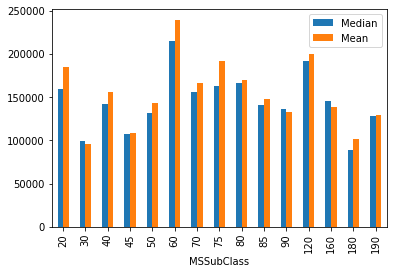

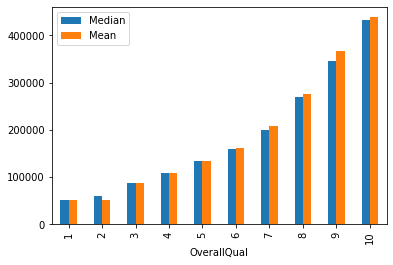

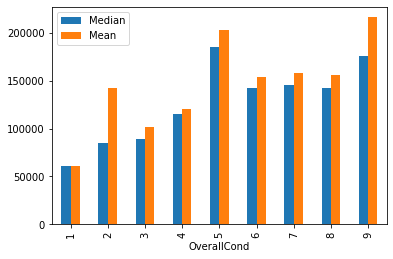

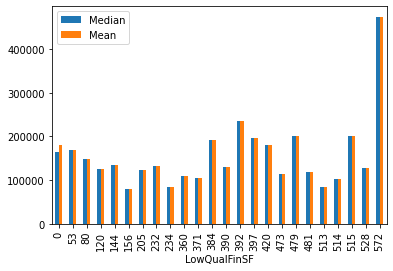

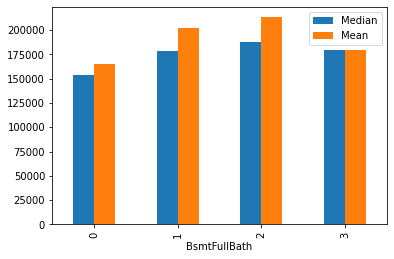

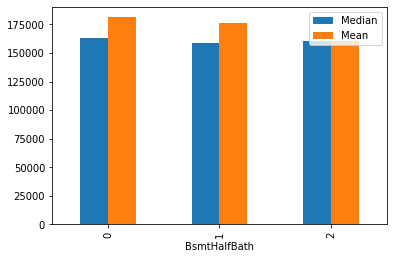

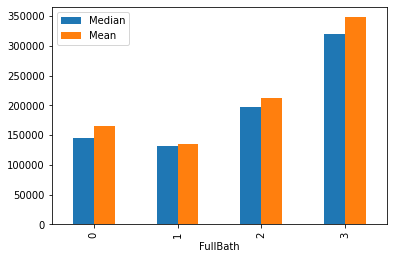

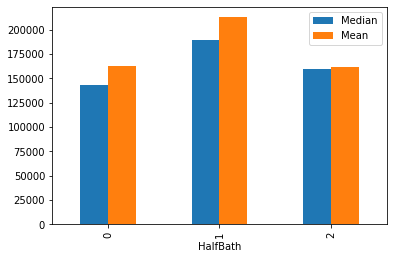

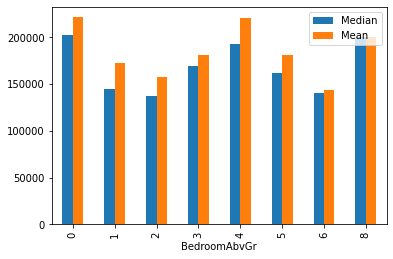

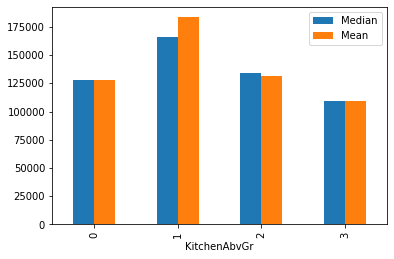

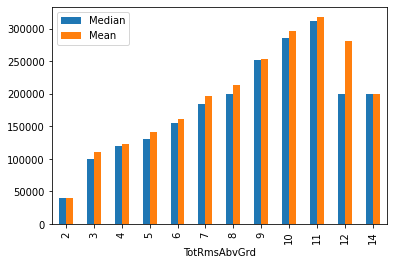

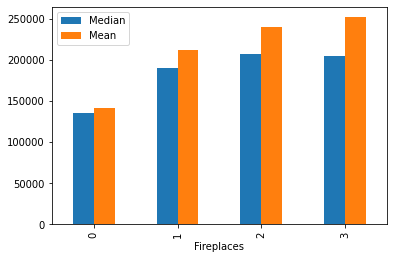

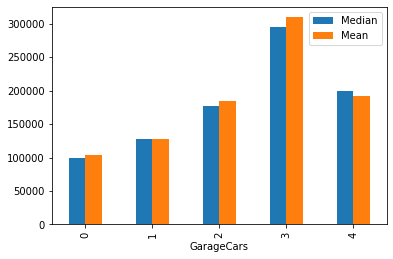

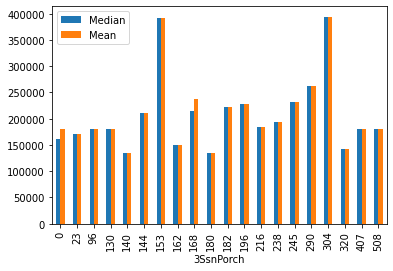

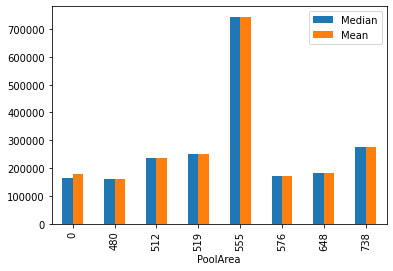

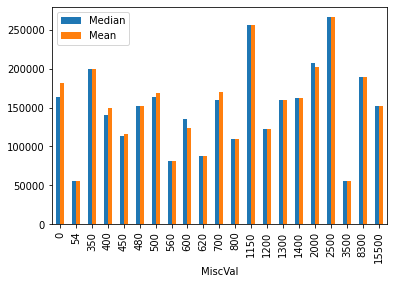

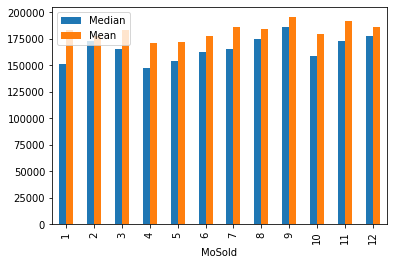

In [20]:
for feature in features_num_disc:
  pd.concat([df_train.groupby(feature)[target].median(), df_train.groupby(feature)[target].mean()],axis=1).plot.bar()
  plt.legend(['Median','Mean'])
  plt.show()

We can see that some features has some good correlation with the SalePrice

Now We'll Start treating the missing values. We'll Concatinate both train set and test set to make process easy.

In [21]:
df = pd.concat([df_train.drop(columns=['SalePrice']),df_test], axis=0)
df.shape

(2919, 80)

In [22]:
#Continuous Numeric Features
features_num_cont = [feature for feature in features_num if feature not in features_num_disc and feature not in features_year+['Id',target]]
print('No of Continuous Numeric Features : ',len(features_num_cont))

No of Continuous Numeric Features :  15


In [23]:
features_num_cont_nan = [feature for feature in features_num_cont if df[feature].isna().sum() > 0]
df[features_num_cont_nan].isna().sum()

LotFrontage    486
MasVnrArea      23
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
GarageArea       1
dtype: int64

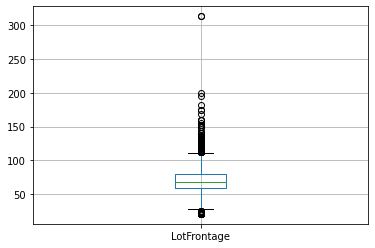

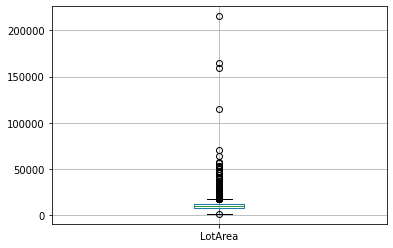

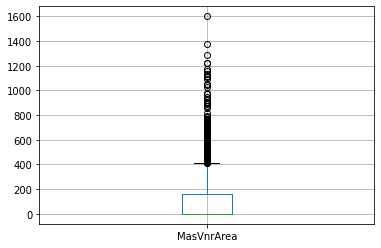

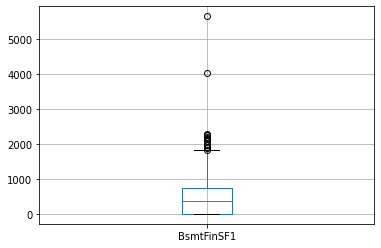

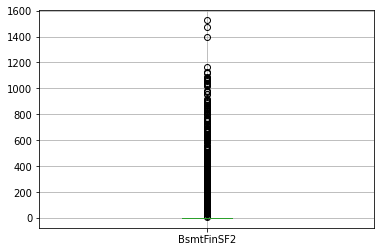

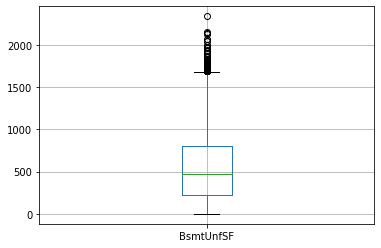

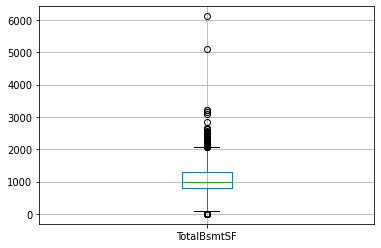

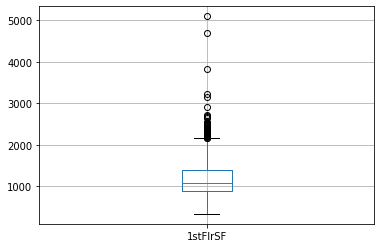

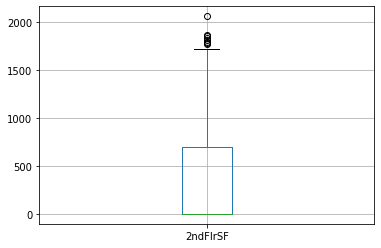

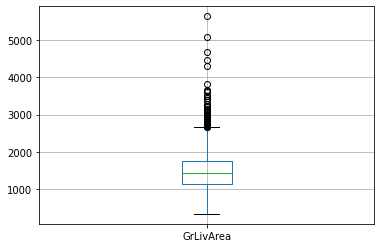

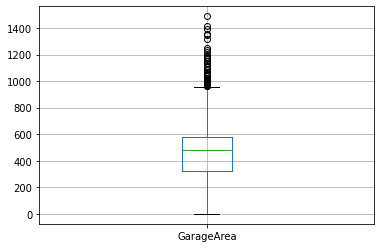

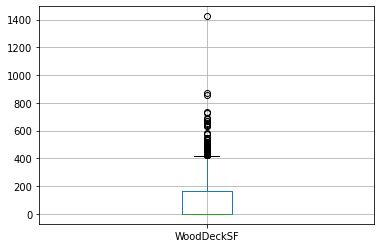

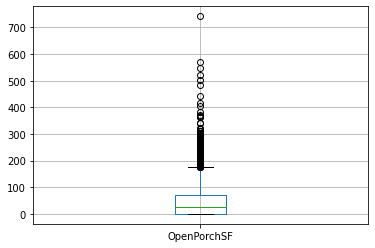

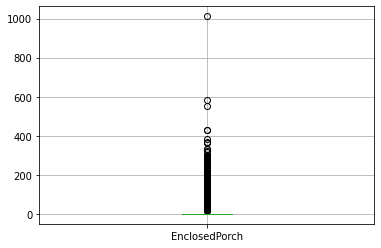

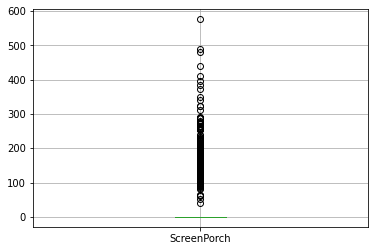

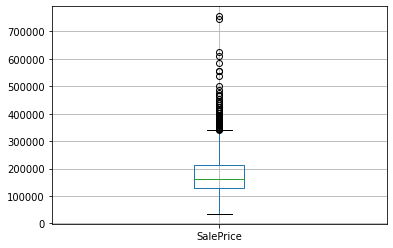

In [24]:
#Outlier Detection
for feature in features_num_cont:
    df.boxplot(column=feature)
    plt.show()
df_train.boxplot(column=target)
plt.show()

We can observe that there are many outliers. So it is better to impute the missing values with Median

In [25]:
#Replacing Missing Values with Median
for feature in features_num_cont_nan:
  df[feature].fillna(df[feature].median(), inplace = True)

In [26]:
df[features_num_cont_nan].isna().sum()

LotFrontage    0
MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
GarageArea     0
dtype: int64

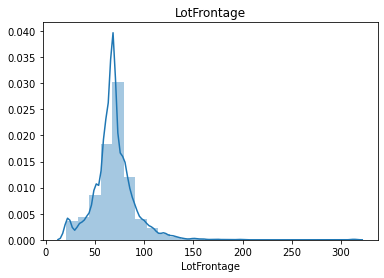

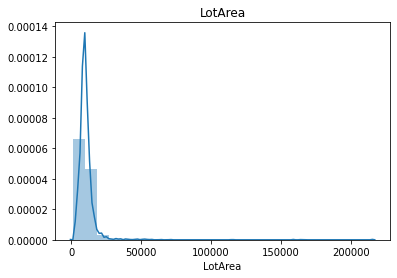

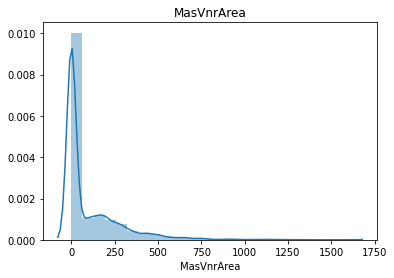

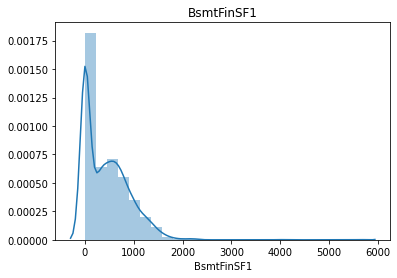

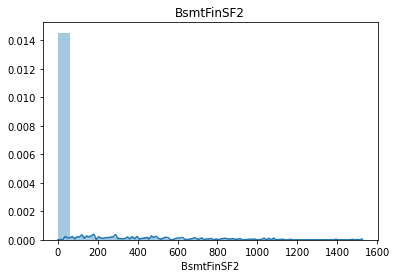

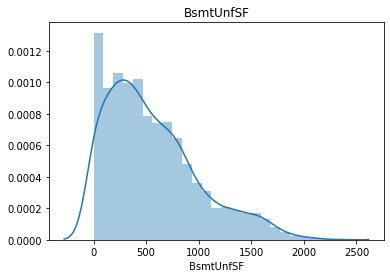

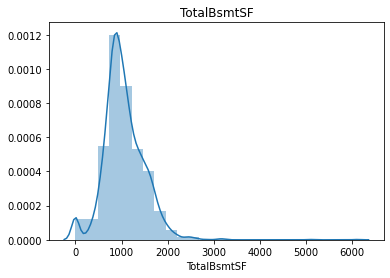

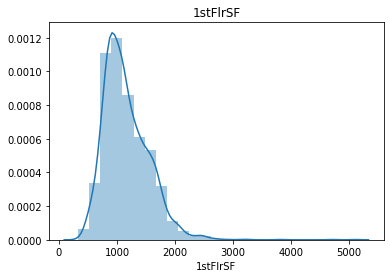

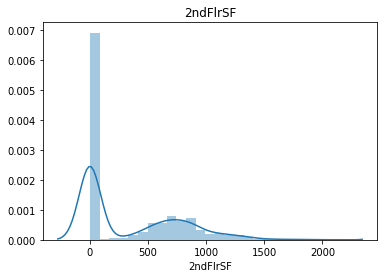

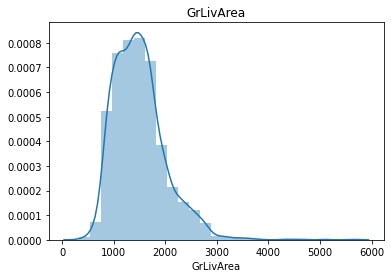

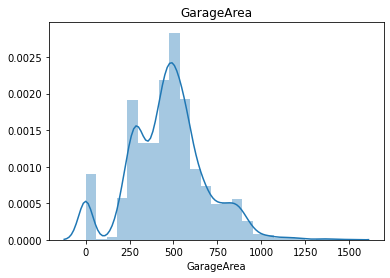

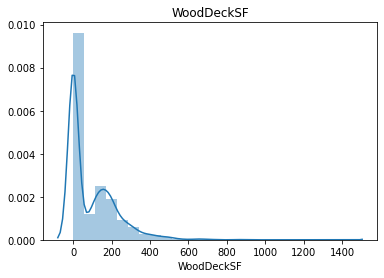

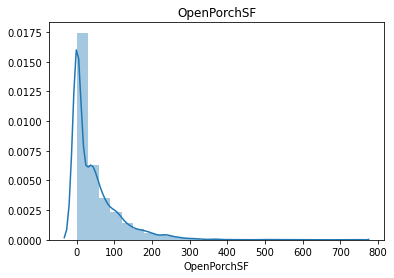

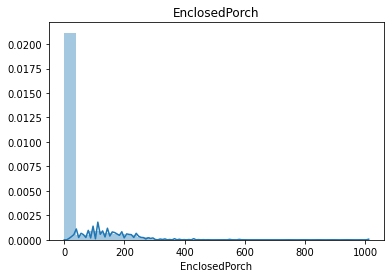

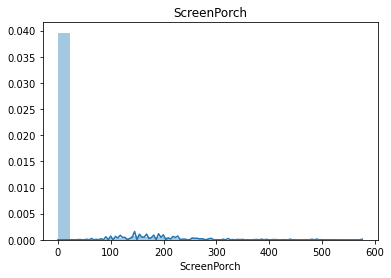

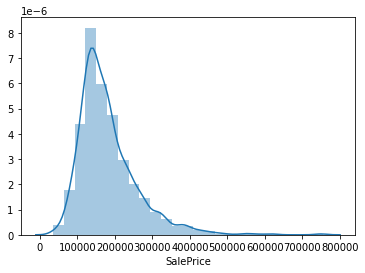

In [27]:
#Distribution of Continuous Features
for feature in features_num_cont:
  #plt.hist(df[feature], bins=25)
  sns.distplot(df[feature],bins=25)
  plt.title(feature)
  plt.show()
sns.distplot(df_train[target],bins=25)
plt.show()

We Can observe that the distribution is not not normal. Most of the features has right Skewness. This can be remove by applying some transdormations like Log transformation and Box-Cox Transformation.

In [28]:
#Measure of Skewness
skewness = df[features_num_cont].apply(lambda x: skew(x))
print(skewness.sort_values(ascending=False))
print('Skewness of SalePrice : ',df_train[target].skew())

LotArea          12.822431
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.674852
1stFlrSF          1.469604
BsmtFinSF1        1.425378
GrLivArea         1.269358
TotalBsmtSF       1.162616
BsmtUnfSF         0.919703
2ndFlrSF          0.861675
GarageArea        0.241184
dtype: float64
Skewness of SalePrice :  1.8828757597682129


In [29]:
#Applying Log Transformation to the SalePrice
df_train[target] = np.log1p(df_train[target])
#Applying BoxCox transformations for remaining
for feature in features_num_cont:
  df[feature] = boxcox1p(df[feature] , boxcox_normmax(df[feature]+1))

#Measure of Skewness after Applying Transformation
skewness = df[features_num_cont].apply(lambda x: skew(x)).sort_values(ascending = False)
print(skewness)
print('Skewness of SalePrice : ',df_train[target].skew())

ScreenPorch      3.153911
BsmtFinSF2       2.579468
EnclosedPorch    2.150157
MasVnrArea       0.976354
2ndFlrSF         0.894536
WoodDeckSF       0.784768
OpenPorchSF      0.621025
BsmtFinSF1       0.374278
TotalBsmtSF      0.369975
GarageArea       0.204664
BsmtUnfSF        0.054027
LotFrontage      0.051086
GrLivArea        0.004848
1stFlrSF        -0.011611
LotArea         -0.135401
dtype: float64
Skewness of SalePrice :  0.12134661989685333


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


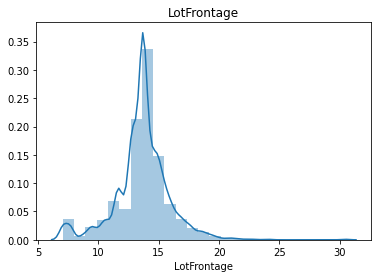

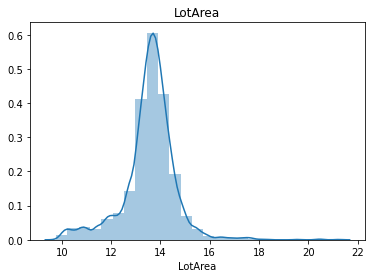

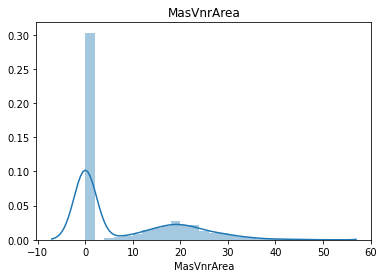

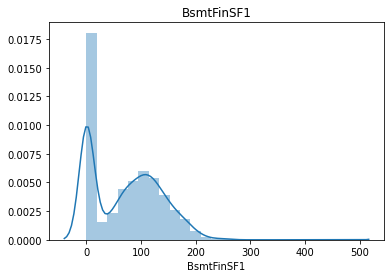

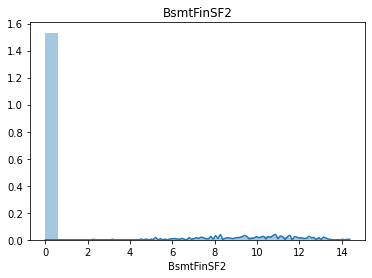

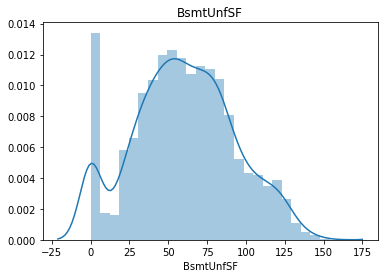

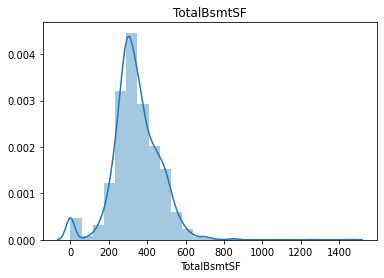

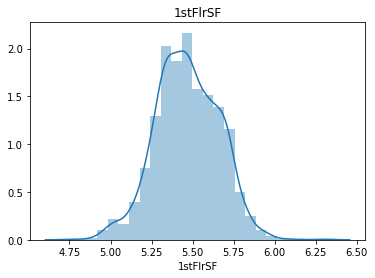

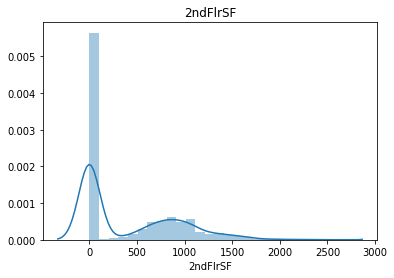

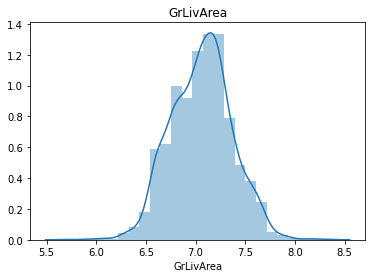

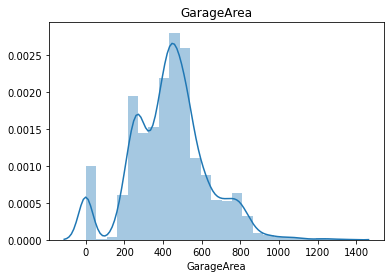

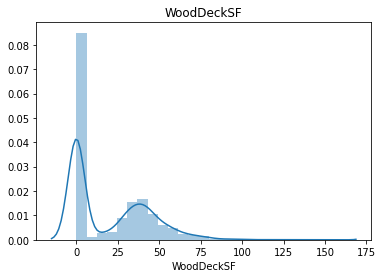

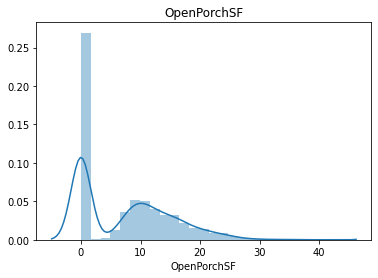

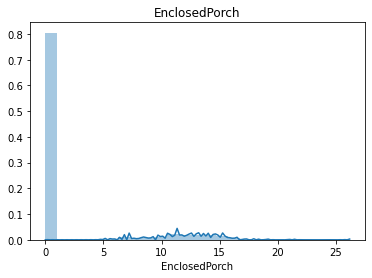

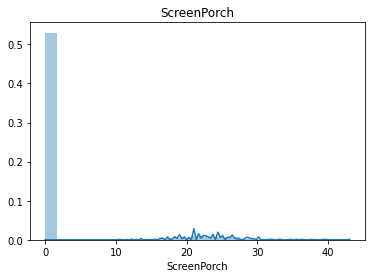

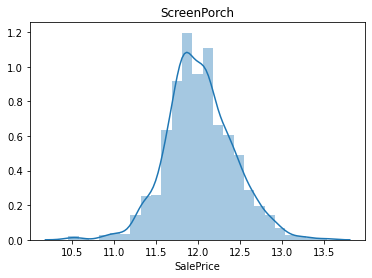

In [30]:
#Distribution of Continuous Features
for feature in features_num_cont:
  #plt.hist(df_train[feature], bins=25)
  sns.distplot(df[feature],bins=25)
  plt.title(feature)
  plt.show()
sns.distplot(df_train[target],bins=25)
plt.title(feature)
plt.show()

We can see that the Skewness has been sgnificantly reduced and Distribution is almost normal

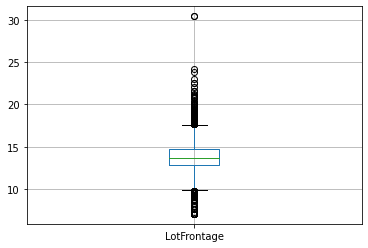

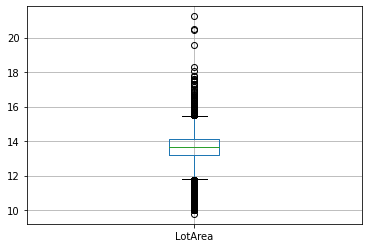

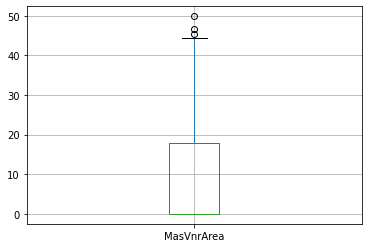

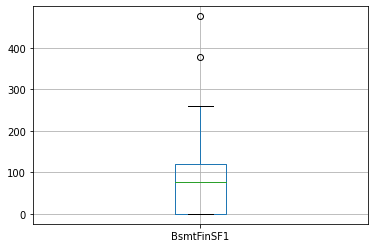

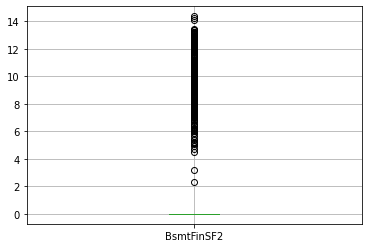

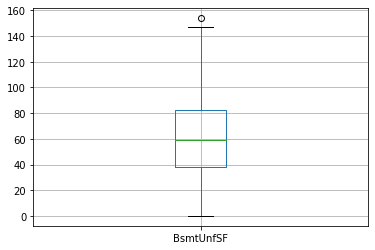

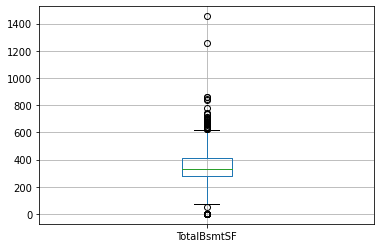

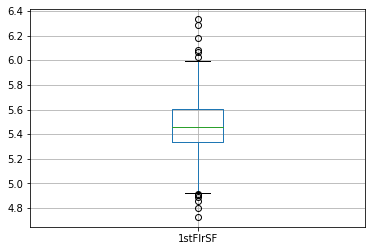

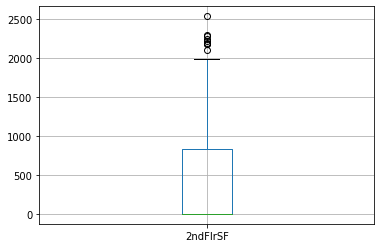

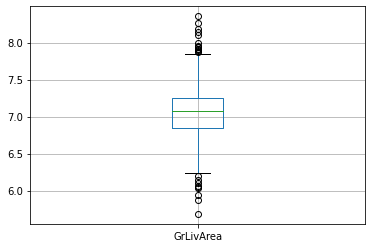

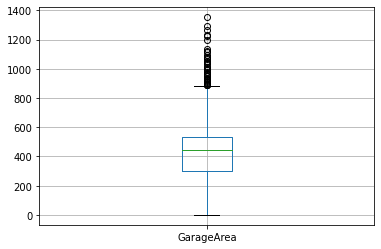

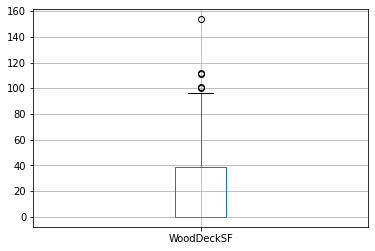

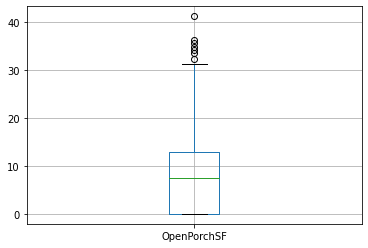

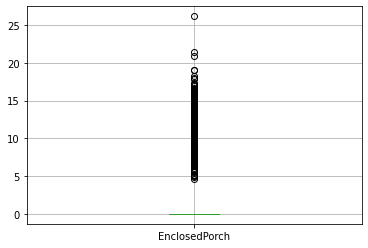

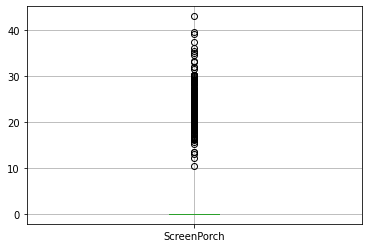

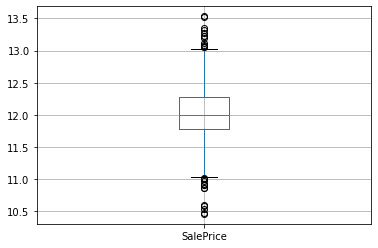

In [31]:
#Outlier Detection After Transformation
for feature in features_num_cont:
  df.boxplot(column=feature)
  plt.show()
df_train.boxplot(column=target)
plt.show()

We can also observe that Outliers are also slightly decreased

In [32]:
#Categorical Features
features_names = df.columns
features_categ = [feature for feature in features_names if df[feature].dtype == 'O']
print('No of Categorical features : ',len(features_categ))
features_categ

No of Categorical features :  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
#Missing Values in Categorical values
features_categ_nan = [feature for feature in features_categ if df[feature].isna().sum() > 0]
print('No of features with Missing Values in Categorical Feature : ',len(features_categ_nan))
df[features_categ_nan].isna().sum().sort_values(ascending=False)

No of features with Missing Values in Categorical Feature :  23


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
SaleType           1
Exterior2nd        1
KitchenQual        1
Electrical         1
dtype: int64

In [34]:
#Handling Missing Values for Categorical Values
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [35]:
#Missing Values in Categorical values
features_categ_nan = [feature for feature in features_categ if df[feature].isna().sum() > 0]
print('No of features with Missing Values in Categorical Feature : ',len(features_categ_nan))
df[features_categ_nan].isna().sum().sort_values(ascending=False)

No of features with Missing Values in Categorical Feature :  14


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
dtype: int64

In [36]:
for feature in features_categ_nan:
  df[feature] = df[feature].fillna('missing')

In [37]:
df[features_categ_nan].isna().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

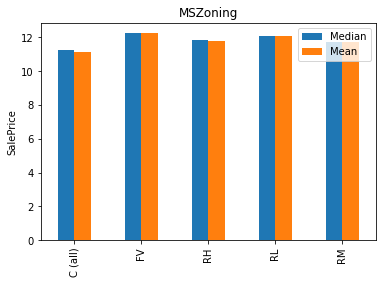

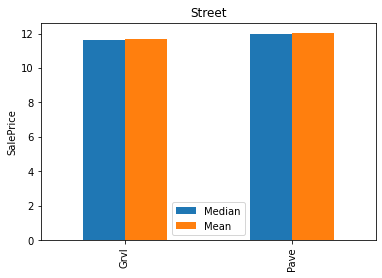

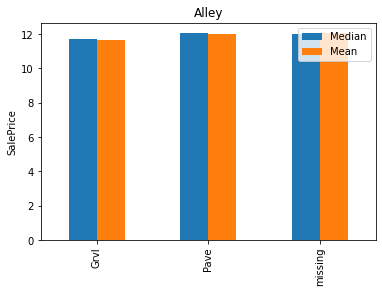

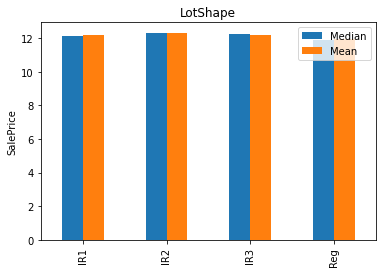

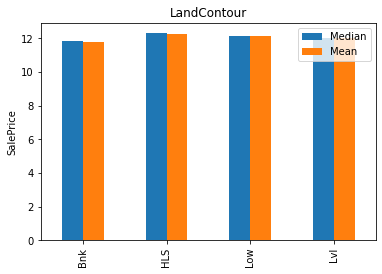

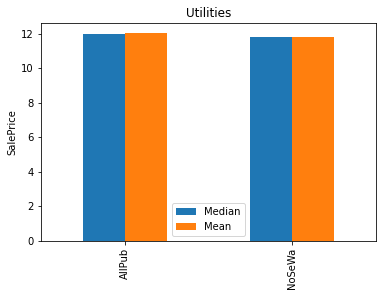

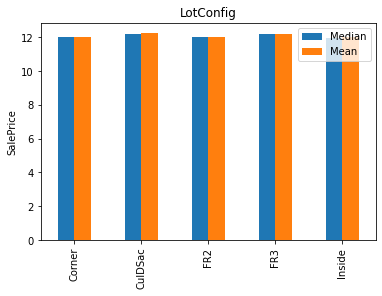

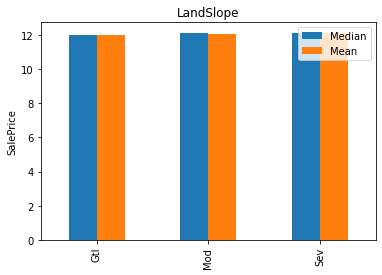

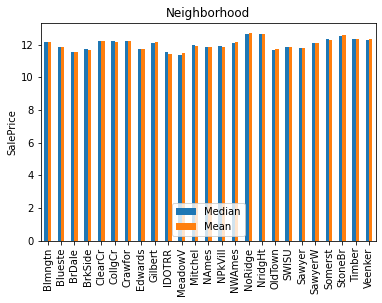

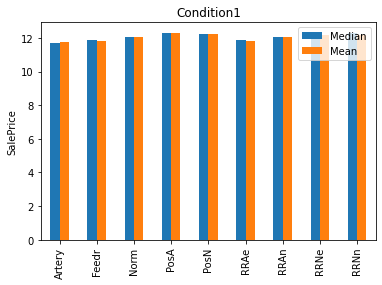

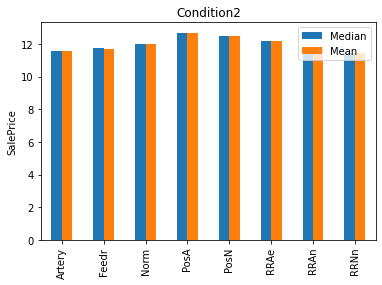

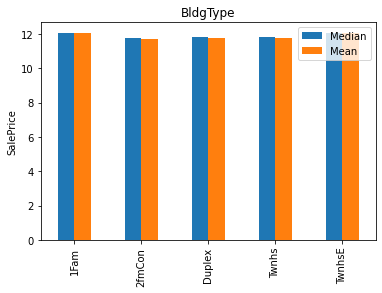

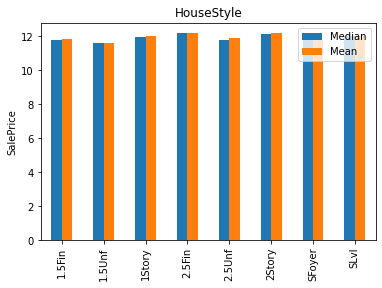

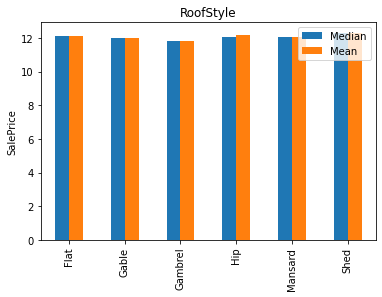

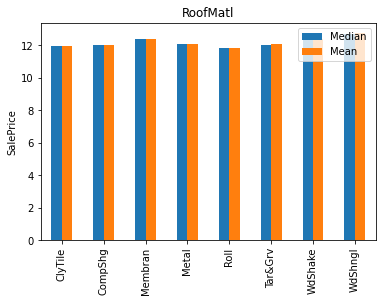

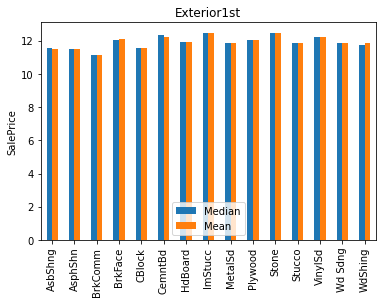

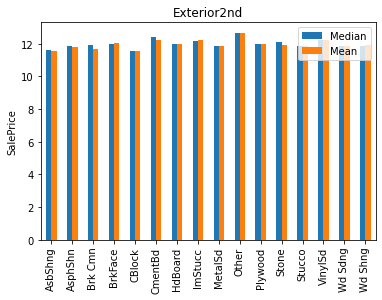

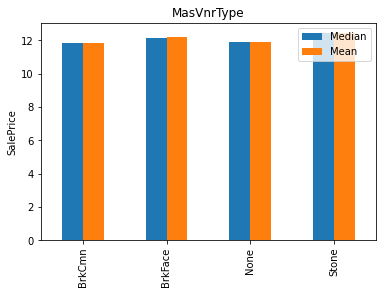

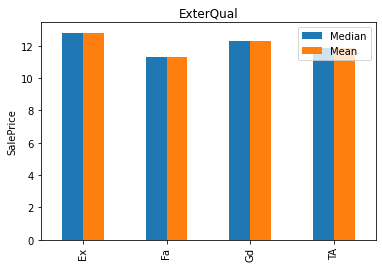

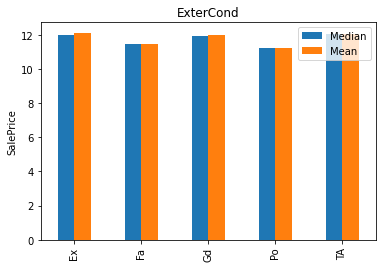

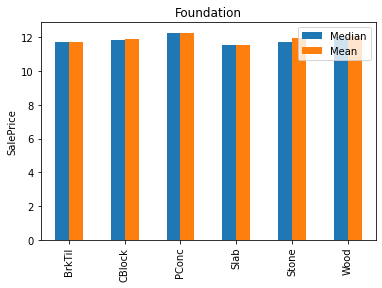

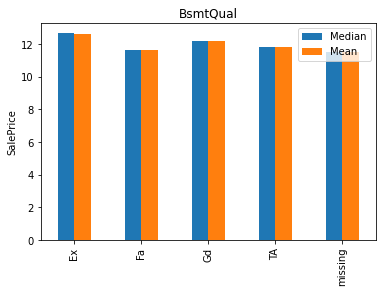

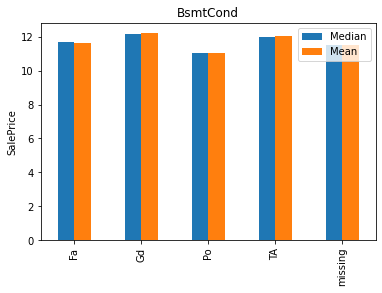

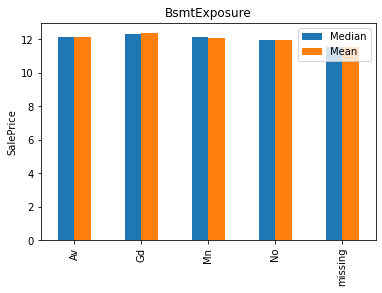

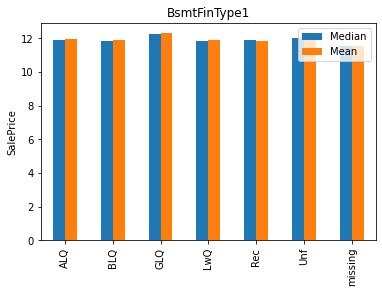

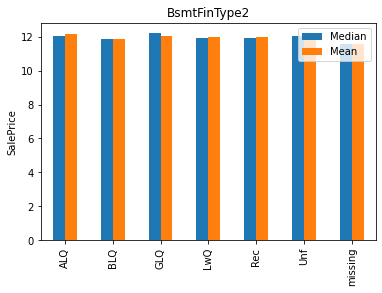

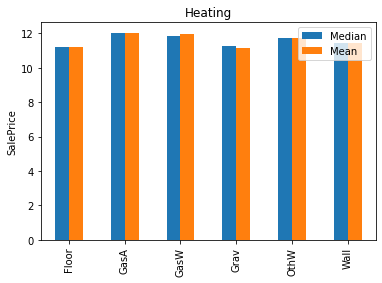

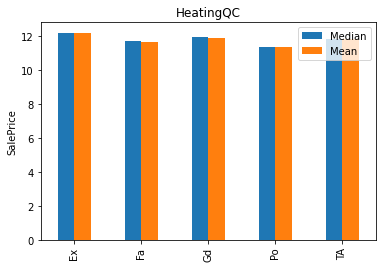

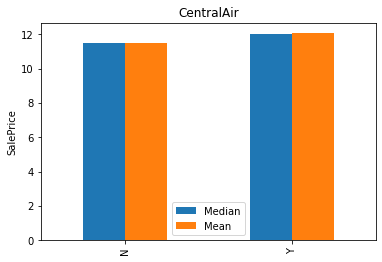

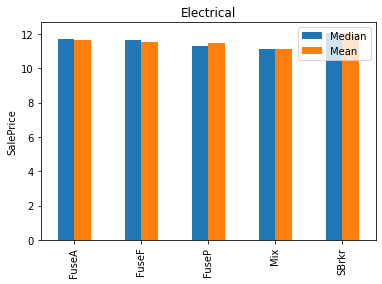

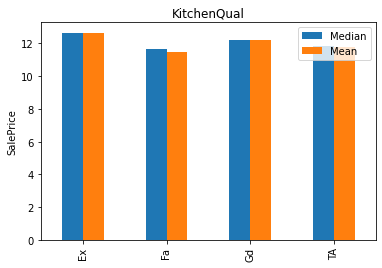

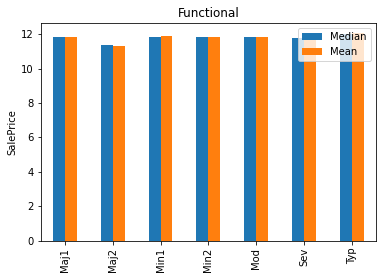

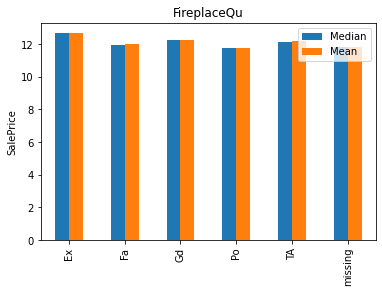

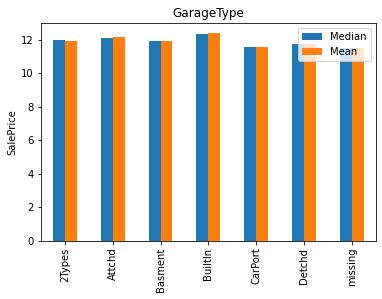

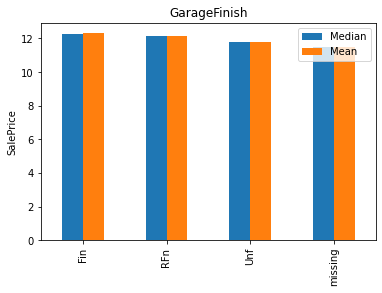

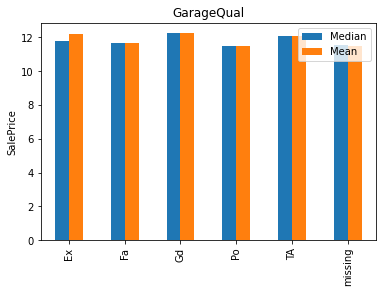

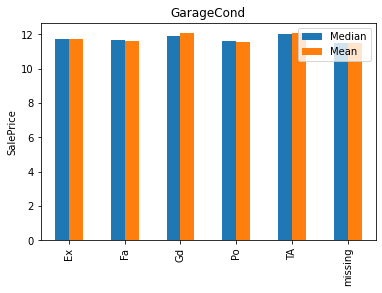

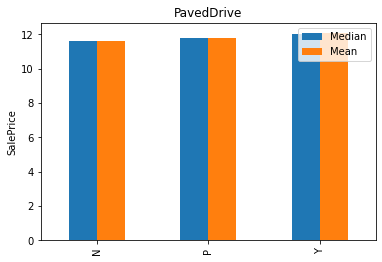

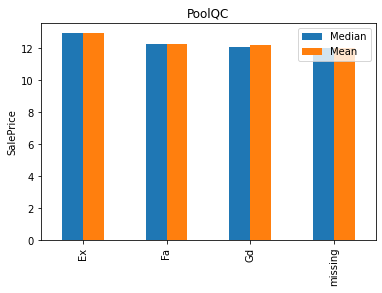

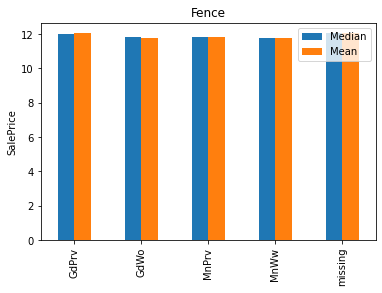

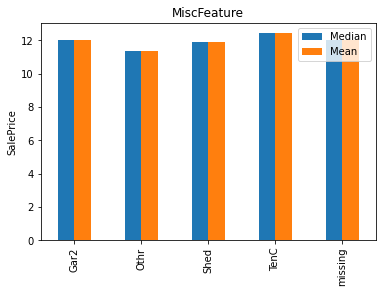

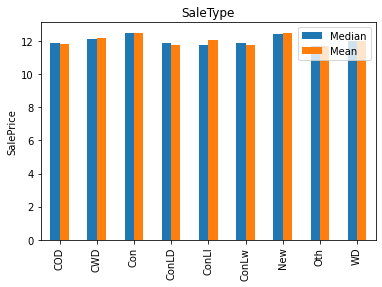

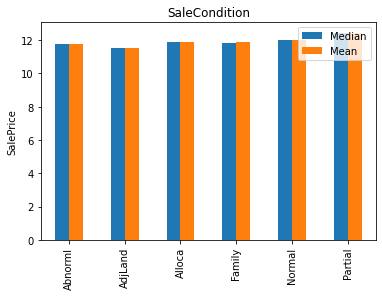

In [38]:
#Visualizing the relationship between categorical features and SalePrice
temp_data = pd.concat([df.iloc[0:df_train_len,:],df_train[target]], axis=1)
for feature in features_categ:
    pd.concat([temp_data.groupby(feature)[target].median(), temp_data.groupby(feature)[target].mean()],axis=1).plot.bar()
    plt.legend(['Median','Mean'])
    plt.xlabel(None)
    plt.ylabel(target)
    plt.title(feature)
    plt.show()

In [39]:
df.isna().sum().sort_values(ascending=False)

GarageYrBlt      159
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
ExterQual          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
SaleCondition      0
YearBuilt          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
YearRemodAdd       0
OverallCond        0
BsmtUnfSF          0
LandContour        0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
Utilities          0
OverallQual        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
BsmtFinSF2         0
Heating            0
TotalBsmtSF        0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive   

In [40]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)

In [41]:
#Replacing Years With their diff and filling the nan values with 0
df_yr = pd.DataFrame()
for feature in features_year:
  if feature != 'YrSold':
    df_yr['age'+feature] = df['YrSold'] - df[feature]

df_yr.fillna(0, inplace=True)
df_yr.head()

,ageYearBuilt,ageYearRemodAdd,ageGarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [42]:
#Dropping Years and replacing with df_yr feature
df.drop(columns=features_year, inplace=True)
df = pd.concat([df,df_yr], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,ageYearBuilt,ageYearRemodAdd,ageGarageYrBlt
0,1,60,RL,13.360621,13.424520,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.378557,Gd,TA,PConc,Gd,TA,No,GLQ,117.868640,Unf,0.0,29.995168,294.379426,GasA,Ex,Y,SBrkr,5.318379,1019.540733,0,7.234115,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,RFn,2.0,505.650456,TA,TA,Y,0.000000,12.009558,0.000000,0,0.0,0,missing,missing,missing,0,2,WD,Normal,5,5,5.0
1,2,20,RL,14.945970,13.694527,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,146.822679,Unf,0.0,44.142425,403.706393,GasA,Ex,Y,SBrkr,5.550627,0.000000,0,6.947212,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,425.563026,TA,TA,Y,56.339208,0.000000,0.000000,0,0.0,0,missing,missing,missing,0,5,WD,Normal,31,31,31.0
2,3,60,RL,13.691701,14.034133,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.721069,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.584527,Unf,0.0,56.906414,312.170637,GasA,Ex,Y,SBrkr,5.362015,1034.306417,0,7.275132,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,560.141906,TA,TA,Y,0.000000,9.849185,0.000000,0,0.0,0,missing,missing,missing,0,9,WD,Normal,7,6,7.0
3,4,70,RL,12.790819,13.683421,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.780853,Unf,0.0,64.820609,266.066093,GasA,Gd,Y,SBrkr,5.388291,899.200533,0,7.237969,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,590.983775,TA,TA,Y,0.000000,8.921746,16.012025,0,0.0,0,missing,missing,missing,0,2,WD,Abnorml,91,36,8.0
4,5,60,RL,15.342157,14.550142,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.323127,Gd,TA,PConc,Gd,TA,Av,GLQ,112.052302,Unf,0.0,61.177260,372.990803,GasA,Ex,Y,SBrkr,5.493032,1265.167706,0,7.470741,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,766.526119,TA,TA,Y,42.351292,14.180238,0.000000,0,0.0,0,missing,missing,missing,0,12,WD,Normal,8,8,8.0


In [43]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

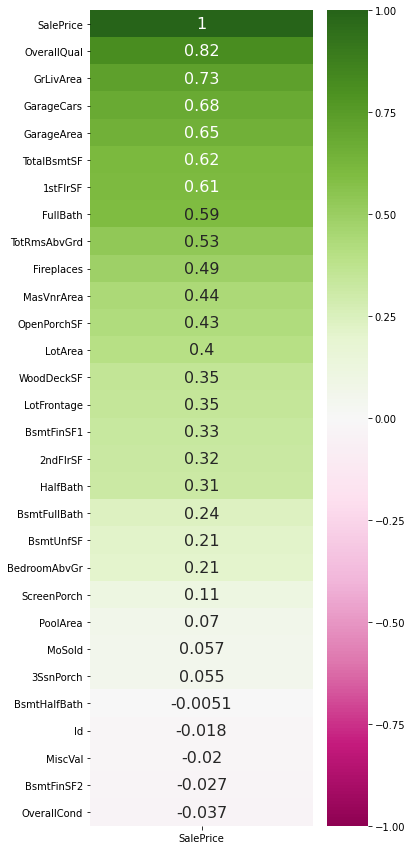

In [46]:
corr_df=pd.concat([df.iloc[0:df_train_len,:],df_train['SalePrice']], axis=1).corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_df[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

Now we can See that there are no Missing Values. Now we perform One hot encoding

In [47]:
#One Hot encoding
df_encode = pd.get_dummies(df)
print('Shape of Data before Encoding : ',df.shape)
print('Shape of Data after Encoding  : ',df_encode.shape)

Shape of Data before Encoding :  (2919, 79)
Shape of Data after Encoding  :  (2919, 302)


In [48]:
df_train_processed = pd.concat([df_encode.iloc[0:df_train_len,:], df_train[target]], axis=1)
df_test_processed = df_encode.iloc[df_train_len:,:]
print(df_train_processed.shape)
print(df_test_processed.shape)

(1460, 303)
(1459, 302)


**Outlier Detection**

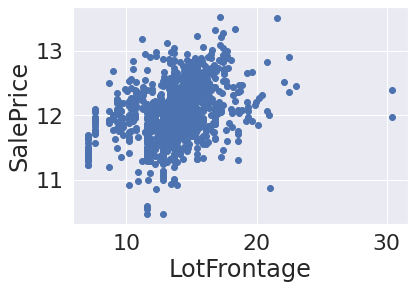

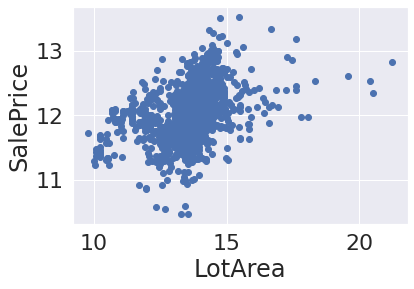

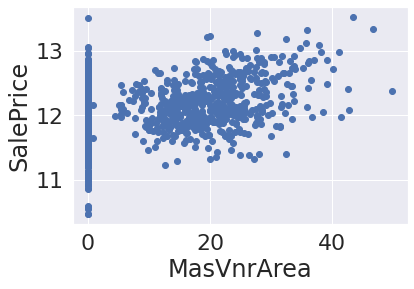

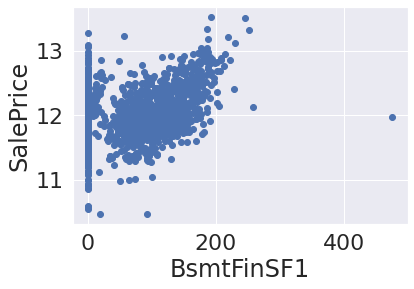

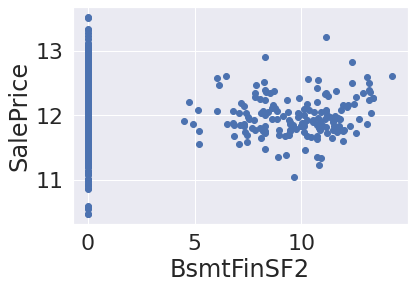

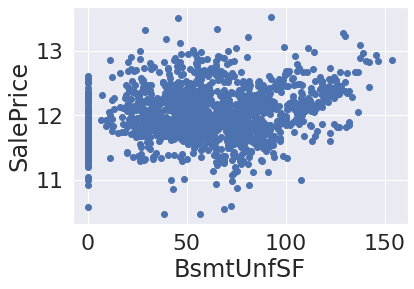

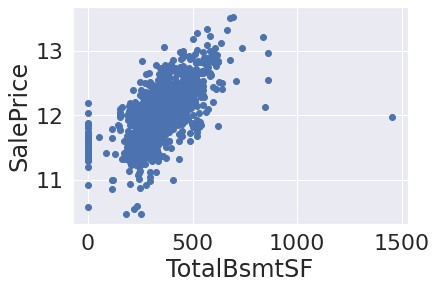

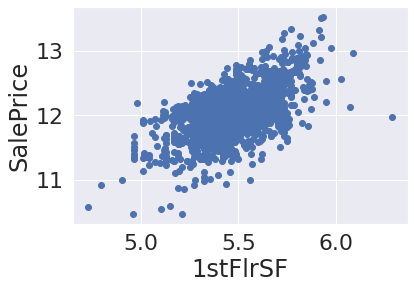

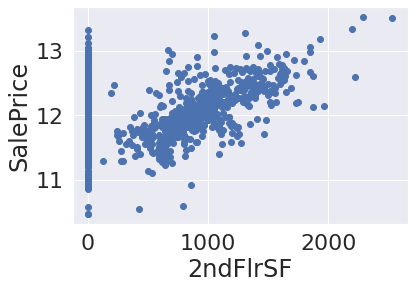

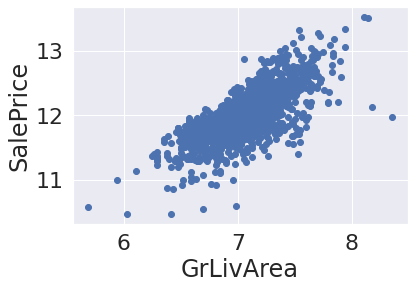

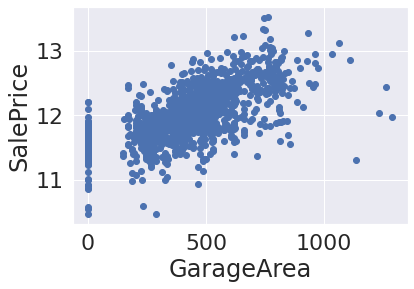

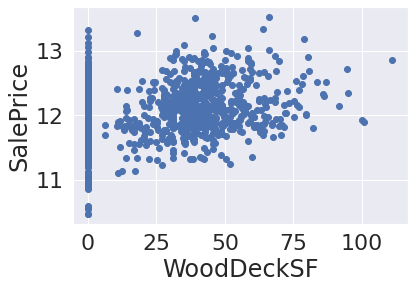

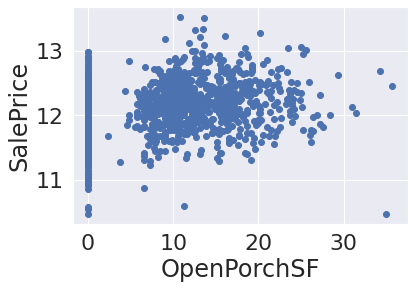

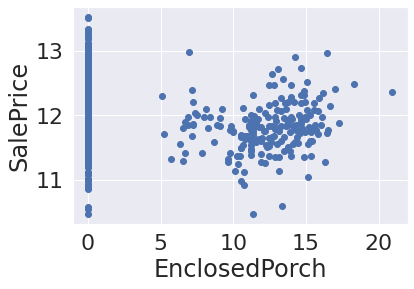

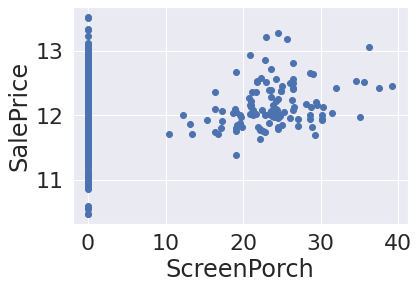

In [49]:
for feature in features_num_cont:
  plt.scatter(df_train_processed[feature],df_train_processed[target])
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.show()

We can observe that there are Outliers So we need to remove them. To satisfy the properties of regression.
Here we select GrLiveArea to remove the outliers. Since its spread along the sales price is linear and we can clearly see the outliers




In [50]:
df_train_processed[df_train_processed['GrLivArea'] > 8.15][['Id','GrLivArea',target]]

,Id,GrLivArea,SalePrice
523,524,8.179623,12.126764
1298,1299,8.355351,11.982935


In [51]:
#Dropping those two outliers
df_train_processed = df_train_processed.drop(df_train_processed[df_train['Id'] == 524].index)
df_train_processed = df_train_processed.drop(df_train_processed[df_train['Id'] == 1299].index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


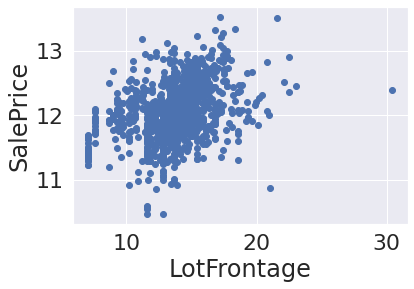

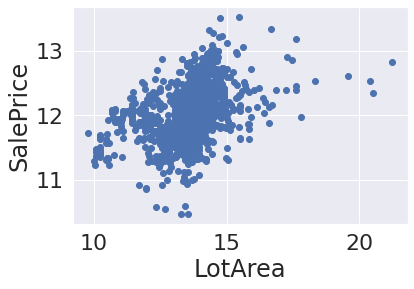

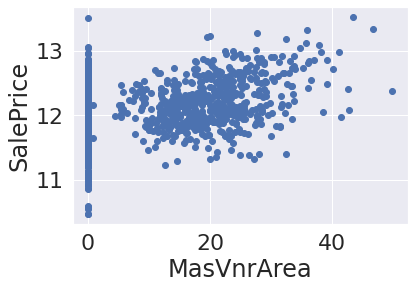

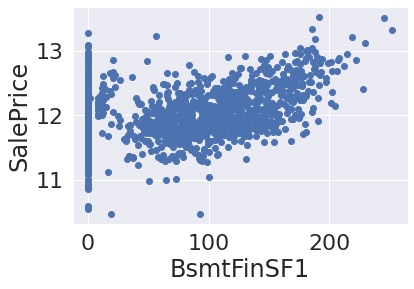

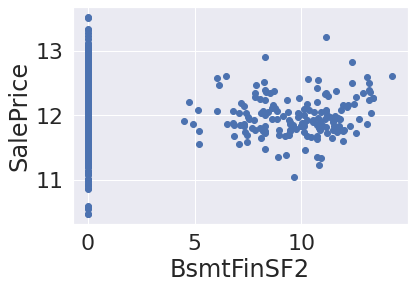

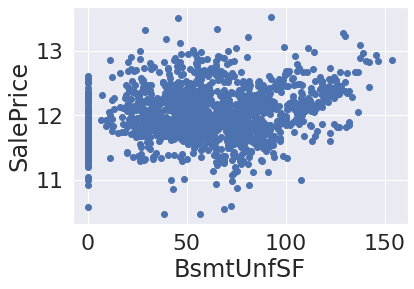

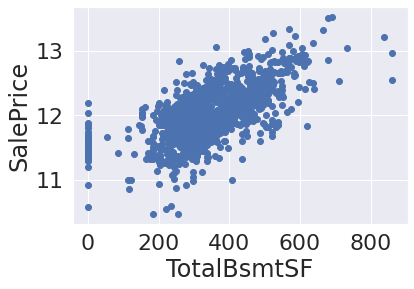

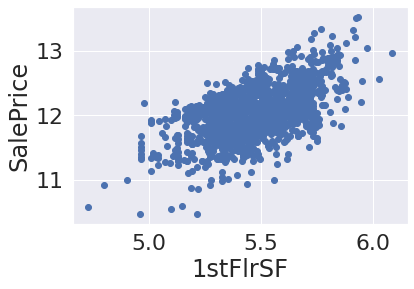

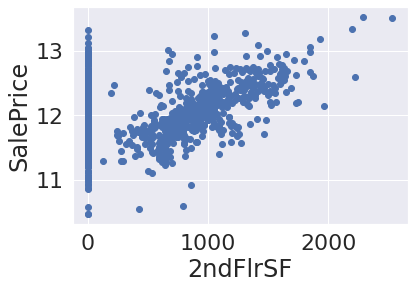

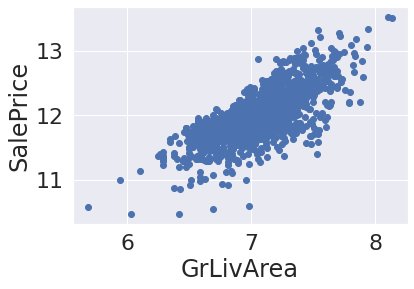

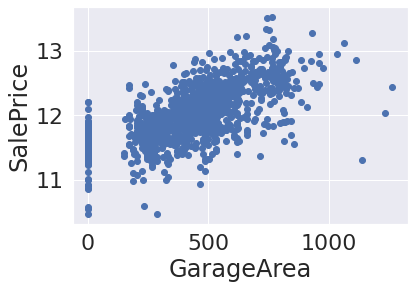

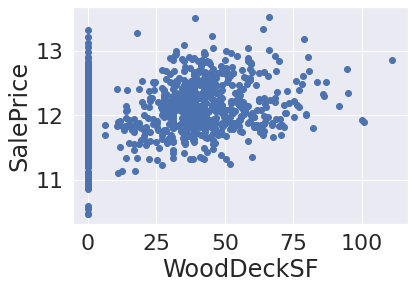

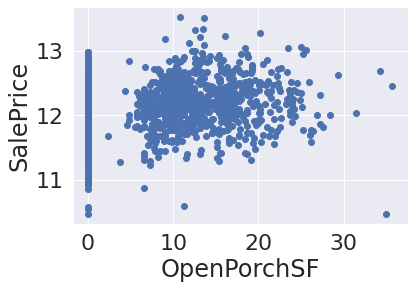

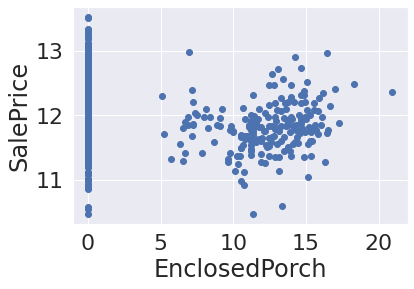

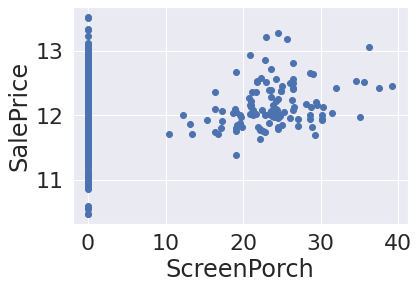

In [52]:
for feature in features_num_cont:
  plt.scatter(df_train_processed[feature],df_train_processed[target])
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.show()

# **Modelling**

**Linear Regression**

In [53]:
X_train = df_train_processed.iloc[:,1:-1]
y_train = df_train_processed[target]
X_test = df_test_processed.iloc[:,1:]
print(X_train.shape)

(1458, 301)


In [54]:
linearReg = LinearRegression()
linearReg.fit(X_train,y_train)
print(linearReg.score(X_train,y_train))
print(mean_squared_error(linearReg.predict(X_train), y_train))

0.9512183096595462
0.007788521885458472


In [55]:
#cross validation
Rcross = cross_val_score(linearReg, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print(-1*Rcross.mean())
print(Rcross.std())

0.01565203433127026
0.001439966386399159


In [56]:
y_pred = linearReg.predict(X_test)
y_pred[0:5]

array([11.70105222, 12.01411128, 12.15250087, 12.21520991, 12.189793  ])

In [57]:
y_pred = np.floor(np.expm1(y_pred))
y_pred[0:5]

array([120697., 165066., 189566., 201834., 196769.])

**Polynomial Regression**

In [58]:
polyReg = PolynomialFeatures(degree=2,order='F')
X_train_poly = polyReg.fit_transform(X_train)
print(X_train_poly.shape)

(1458, 45753)


In [59]:
linearReg.fit(X_train_poly,y_train)
print(linearReg.score(X_train_poly,y_train))
print(mean_squared_error(linearReg.predict(X_train_poly), y_train))

1.0
2.862697055442734e-24


In [60]:
#cross validation
Rcross = cross_val_score(linearReg, X_train_poly, y_train, scoring='neg_mean_squared_error',cv=3)
print(-1*Rcross.mean())
print(Rcross.std())

0.2040192024277839
0.09620774325022398


In [61]:
print(Rcross)

[-0.33828216 -0.11780924 -0.15596621]


In [62]:
X_test_poly = polyReg.fit_transform(X_test)
y_pred = linearReg.predict(X_test_poly)
y_pred[0:5]
y_pred = np.floor(np.expm1(y_pred))
y_pred[0:5]

array([  77541., 1040425.,  209483.,  206578.,  240465.])

**Ridge Regression**

In [63]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(mean_squared_error(ridge.predict(X_train), y_train))

0.9480374262237691
0.008296384160868343


In [64]:
#Ridge Regression using RidgeCV
alpha_ridgeCV = [i for i in np.arange(13,15,0.1)]
param_grid = {'ridge__alpha':alpha_ridgeCV}
pipe = make_pipeline(RobustScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(mean_squared_error(grid.predict(X_train), y_train))
print(grid.best_params_)

0.9436409482428038
0.008998329188494586
{'ridge__alpha': 14.299999999999995}


In [65]:
Rcross = cross_val_score(grid, X_train, y_train, scoring='neg_mean_squared_error')
print(-1*Rcross.mean())
print(Rcross.std())
print(Rcross)

0.012414744398876867
0.0014323140830186795
[-0.0115063  -0.01329593 -0.01451022 -0.0103496  -0.01241167]


In [66]:
y_pred_ridge = grid.predict(X_test)
y_pred_ridge = np.round(np.expm1(y_pred_ridge))
print(y_pred_ridge[0:5])

[118657. 158488. 186184. 200471. 193405.]


**Lasso Regression**

In [67]:
alpha_lassoCV = [10**i for i in range(-6,3,1)]
param_grid = {'lasso__alpha':alpha_lassoCV}
pipe = make_pipeline(RobustScaler(), Lasso())
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(mean_squared_error(grid.predict(X_train), y_train))
print(grid.best_params_)

0.9354382267740908
0.010307981954389202
{'lasso__alpha': 0.001}


In [68]:
Rcross = cross_val_score(grid, X_train, y_train, scoring='neg_mean_squared_error')
print(-1*Rcross.mean())
print(Rcross.std())
print(Rcross)

0.012146781385859546
0.0015005538491696074
[-0.01101045 -0.01287701 -0.01462628 -0.01035629 -0.01186388]


In [69]:
y_pred_lasso = grid.predict(X_test)
y_pred_lasso = np.round(np.expm1(y_pred_lasso))
print(y_pred_lasso[0:5])

[120564. 150955. 182772. 202802. 191137.]


**ElasticNet Regression**

In [70]:
alpha_elasticCV = [10**i for i in range(-6,3,1)]
print(alpha_elasticCV)
param_grid = {'elasticnet__alpha':alpha_elasticCV}
pipe = make_pipeline(RobustScaler(), ElasticNet())
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(mean_squared_error(grid.predict(X_train), y_train))
print(grid.best_params_)

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
0.9401286657671764
0.009559102887364357
{'elasticnet__alpha': 0.001}


In [71]:
Rcross = cross_val_score(grid, X_train, y_train, scoring='neg_mean_squared_error')
print(-1*Rcross.mean())
print(Rcross.std())
print(Rcross)

0.011903206077991965
0.001499541357712158
[-0.0107201  -0.01242331 -0.01432772 -0.00998728 -0.01205762]


In [72]:
y_pred_elastic = grid.predict(X_test)
y_pred_elastic = np.round(np.expm1(y_pred_elastic))
print(y_pred_elastic[0:5])

[119870. 152045. 183520. 201974. 194017.]


**SVM**

In [73]:
C = [7]
epsilon = [0.03]
gamma = [0.001]
param_grid = {'svr__degree':[1], 'svr__C':C, 'svr__gamma':gamma, 'svr__epsilon':epsilon}
pipe = make_pipeline(RobustScaler(), SVR())
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(mean_squared_error(grid.predict(X_train), y_train))
print(grid.best_params_)

0.9552464558514975
0.007145384992192152
{'svr__C': 7, 'svr__degree': 1, 'svr__epsilon': 0.03, 'svr__gamma': 0.001}


In [74]:
y_pred_SVM = grid.predict(X_test)
y_pred_SVM = np.round(np.expm1(y_pred_SVM))
print(y_pred_SVM[0:5])

[121967. 164157. 188657. 202448. 189479.]


**LGBM Regressor**

In [76]:
lgb_regressor= LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
print(lgb_regressor.score(X_train,y_train))
print(mean_squared_error(lgb_regressor.predict(X_train),y_train))

0.9765445622913058
0.0037449130739874415


In [77]:
y_pred_LGB = lgb_regressor.predict(X_test)
y_pred_LGB = np.round(np.expm1(y_pred_LGB))
print(y_pred_LGB[0:5])

[122342. 159311. 188420. 199863. 189154.]


**XGBoost Regressor**

In [83]:
xgb_regressor = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
xgb_regressor.fit(X_train, y_train)
print(xgb_regressor.score(X_train,y_train))
print(mean_squared_error(xgb_regressor.predict(X_train),y_train))

0.9725627479687903
0.004380652585642427


In [84]:
y_pred_XGB = xgb_regressor.predict(X_test)
y_pred_XGB = np.round(np.expm1(y_pred_XGB))
print(y_pred_XGB[0:5])

[124268. 157131. 192563. 198532. 184019.]


In [108]:
#blend of ALL models
y_pred = (0.4*y_pred_ridge+0.4*y_pred_LGB+0.1*y_pred_XGB+0.05*y_pred_lasso+0.05*y_pred_elastic)
y_pred[0:5]

array([120848.1, 157982.7, 187412.5, 200225.6, 190683.2])

In [109]:
submission = pd.concat([df_test_processed['Id'], pd.DataFrame({'SalePrice':y_pred[:]})],axis=1)
#submission.reset_index(drop=True,inplace=True)
submission.head()

,Id,SalePrice
0,1461,120848.1
1,1462,157982.7
2,1463,187412.5
3,1464,200225.6
4,1465,190683.2


In [107]:
submission.to_csv('Submission22.csv',index=False)